In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(42)

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

print("keys = {}".format(list(iris.keys())))
print("data shape = {}".format(iris['data'].shape))
print("target shape = {}".format(iris['target'].shape))

keys = ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
data shape = (150, 4)
target shape = (150,)


In [3]:
x = iris['data'][:, 3:]  # petal width
y = (iris['target'] == 2).astype(np.int)  # 1: Iris-Virginica, 0: else

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

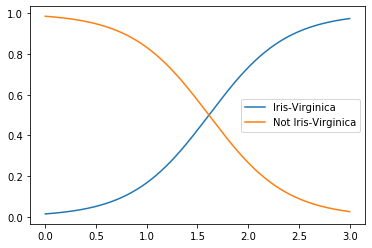

In [5]:
x_test = np.linspace(0, 3, 1000).reshape(-1, 1)
y_hat = log_reg.predict_proba(x_test)

plt.figure()
plt.plot(x_test, y_hat[:, 1], label="Iris-Virginica")
plt.plot(x_test, y_hat[:, 0], label="Not Iris-Virginica")
plt.legend()
plt.show()

In [6]:
x = iris['data'][:, (2, 3)]  # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs', C=10, random_state=42)
softmax_reg.fit(x, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
x_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(x_new)
y_predict = softmax_reg.predict(x_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

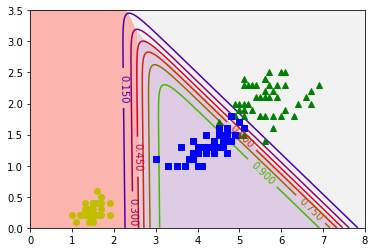

In [8]:
plt.figure()
plt.plot(x[y==2, 0], x[y==2, 1], 'g^', label="Iris-Virginica")
plt.plot(x[y==1, 0], x[y==1, 1], 'bs', label="Iris-Versicolor")
plt.plot(x[y==0, 0], x[y==0, 1], 'yo', label="Iris-Setosa")
plt.contourf(x0, x1, zz, cmap=plt.cm.Pastel1)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.show()